In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import os

In [16]:
path = '/home/taylorm/espr/output/20200913_00/'
file_name = 'slp_hsa.nc'
os.listdir(path)

['tmp850_mean.nc',
 'pwat_mean.nc',
 'tmp925_hsa.nc',
 'wnd_mean.nc',
 'slp_hsa.nc',
 'tmp850_hsa.nc',
 'wnd_hsa.nc',
 'slp_mean.nc',
 'pwat_hsa.nc',
 'tmp925_mean.nc']

In [17]:
f'{path+file_name}'

'/home/taylorm/espr/output/20200913_00/slp_hsa.nc'

In [39]:
slphsa = xr.open_dataset(f'{path+file_name}')
file_name = 'wnd_hsa.nc'
wndhsa = xr.open_dataset(f'{path+file_name}')

In [40]:
wndhsa

<xarray.Dataset>
Dimensions:            (fhour: 29, lat: 121, lon: 261)
Coordinates:
  * fhour              (fhour) timedelta64[ns] 0 days 00:00:00 ... 7 days 00:00:00
  * lat                (lat) float64 80.0 79.5 79.0 78.5 ... 21.5 21.0 20.5 20.0
  * lon                (lon) float64 180.0 180.5 181.0 ... 309.0 309.5 310.0
    valid_time         (fhour) datetime64[ns] ...
    step               (fhour) timedelta64[ns] ...
    heightAboveGround  int64 ...
Data variables:
    u10                (fhour, lat, lon) float32 ...
    v10                (fhour, lat, lon) float32 ...

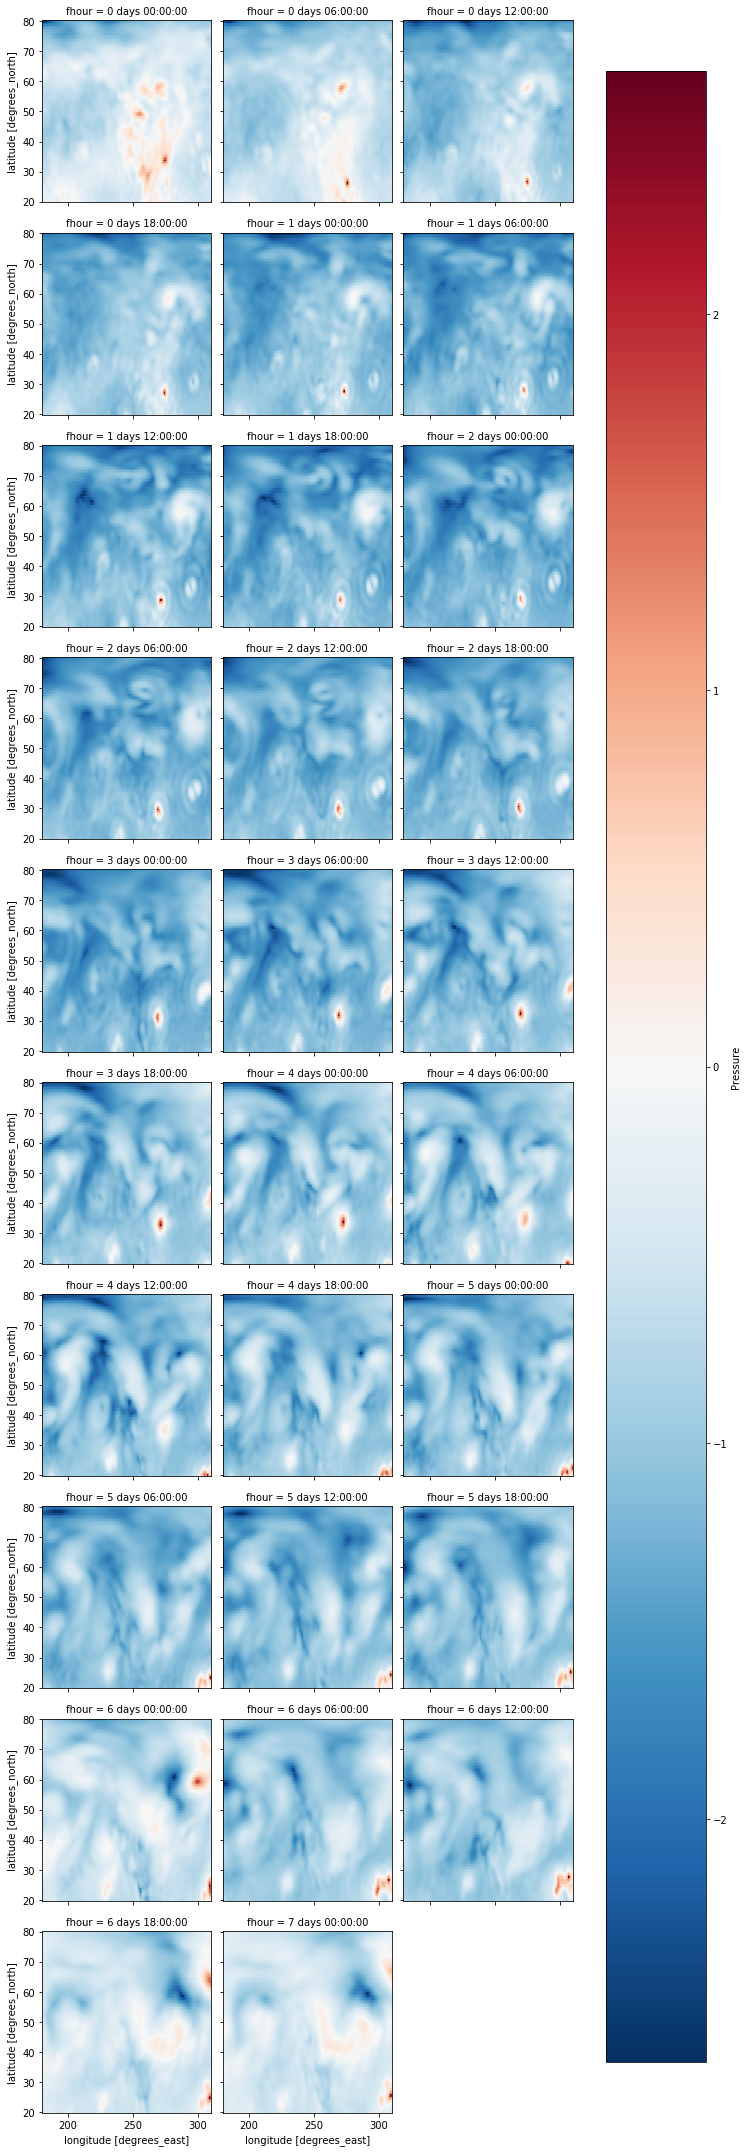

In [24]:
slphsa.Pressure.plot(x="lon", y="lat", col="fhour", col_wrap=3)

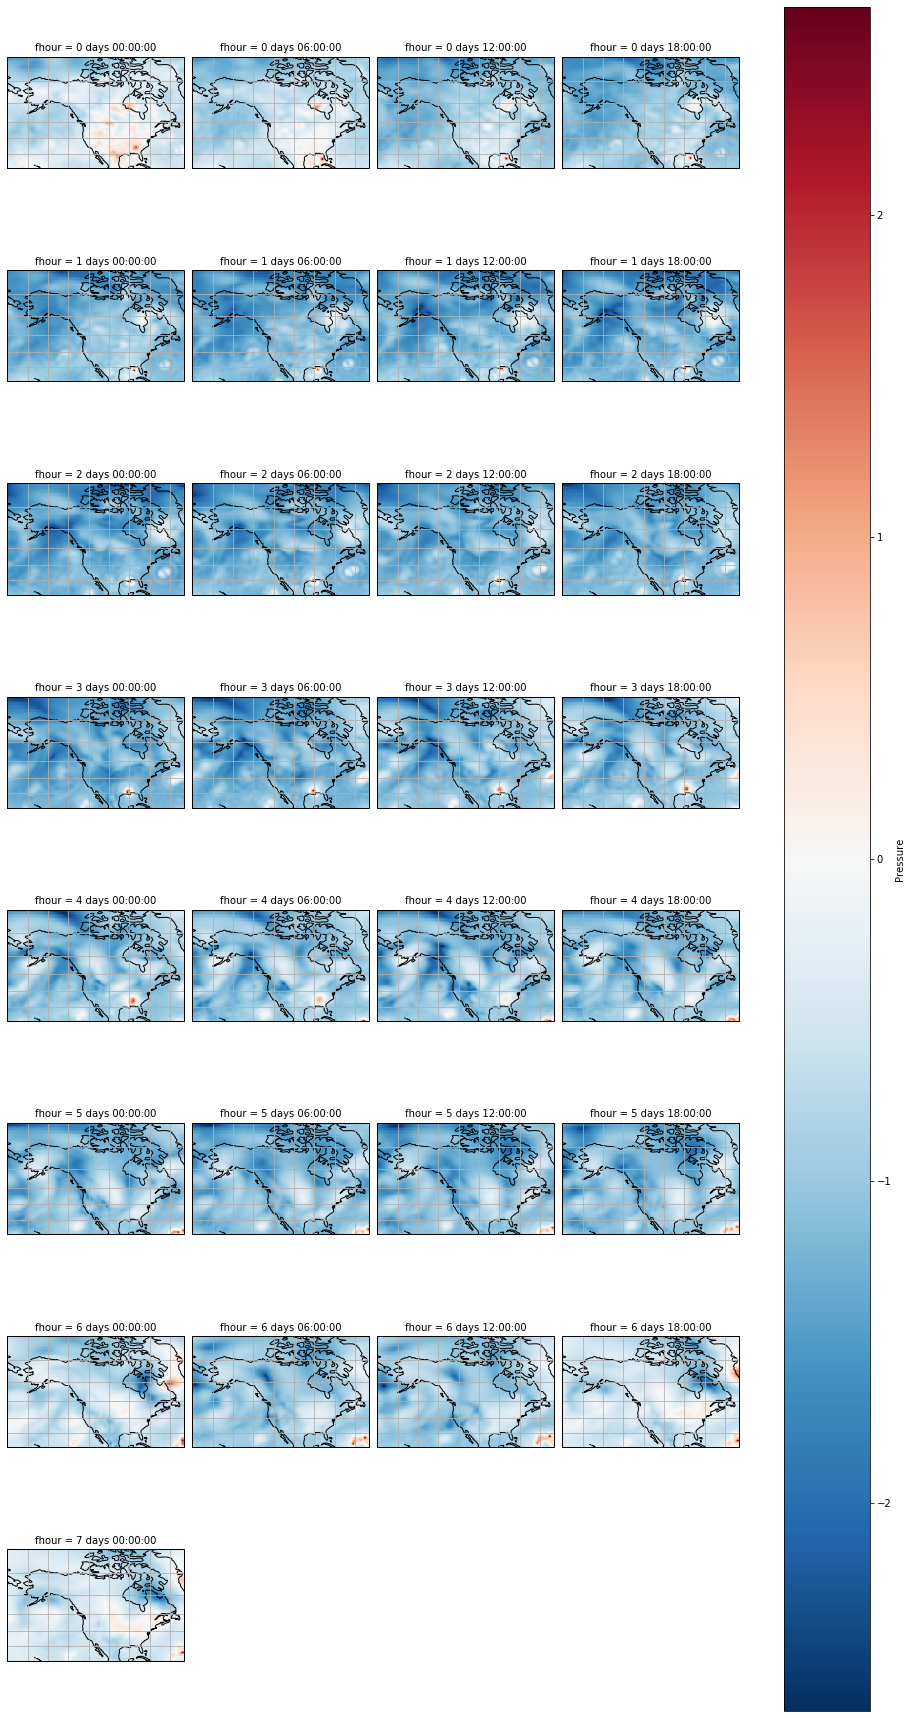

In [26]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
p=slphsa['Pressure'].plot(x='lon', y='lat', col='fhour', col_wrap=4,transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Miller()})
for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()
    ax.set_extent([-180,-50,20,65])

plt.draw()

In [38]:
plt.imsave('2020091300_1day.png', np.squeeze(np.array(slphsa.isel(fhour=4).to_array())))

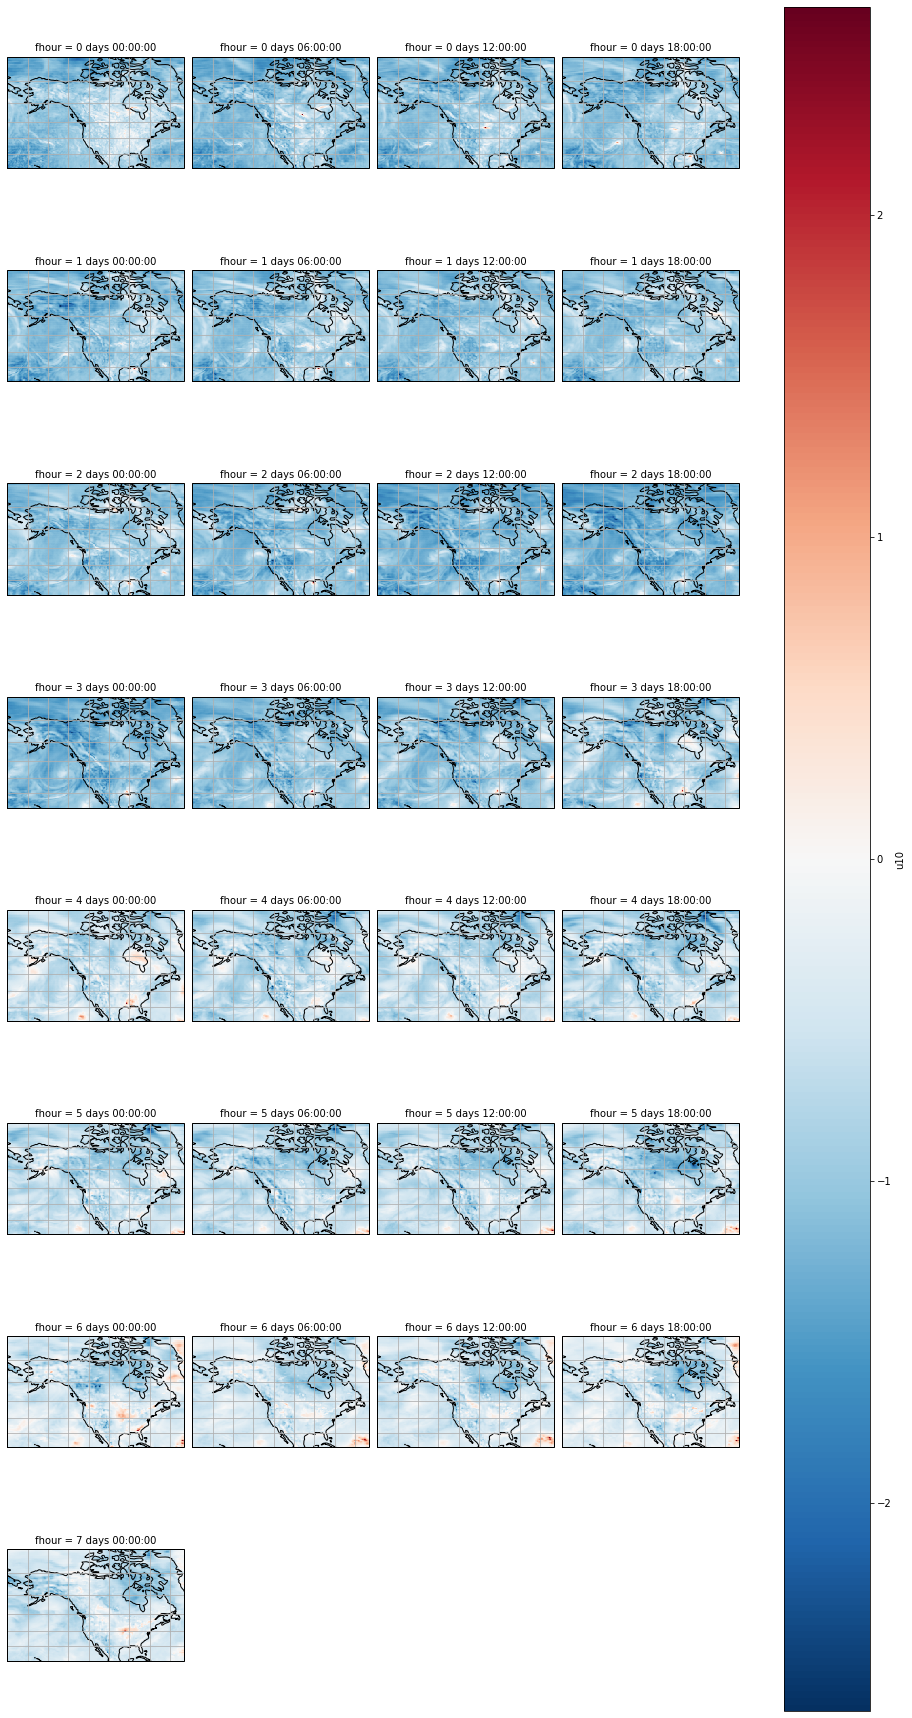

In [41]:
p=wndhsa['u10'].plot(x='lon', y='lat', col='fhour', col_wrap=4,transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Miller()})
for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()
    ax.set_extent([-180,-50,20,65])

plt.draw()